In [1]:
%matplotlib inline
# データを取ってスクレイピングする

import pandas as pd

# 表示するカラムサイズを指定
pd.options.display.max_columns = 60

url = 'http://espn.go.com/mlb/player/stats/_/id/29949/madison-bumgarner'  # ESPN, ホント察してください


In [2]:
datasets = pd.io.html.read_html(url)  # データを読む&スクレイピング(たったこれだけ)

In [3]:
# 投手成績(アッサリ取れた)
datasets[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,PITCHING STATISTICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SEASON,TEAM,GP,GS,CG,SHO,IP,H,R,ER,HR,BB,SO,W,L,SV,HLD,BLSV,WAR,WHIP,ERA
2,2009,SF,4,1,0,0,10.0,8,2,2,2,3,10,0,0,0,0,0,0.3,1.10,1.80
3,2010,SF,18,18,0,0,111.0,119,40,37,11,26,86,7,6,0,0,0,2.3,1.31,3.00
4,2011,SF,33,33,0,0,204.2,202,82,73,12,46,191,13,13,0,0,0,2.1,1.21,3.21
5,2012,SF,32,32,2,1,208.1,183,87,78,23,49,191,16,11,0,0,0,1.8,1.11,3.37
6,2013,SF,31,31,0,0,201.1,146,68,62,15,62,199,13,9,0,0,0,3.9,1.03,2.77
7,2014,SF,33,33,4,2,217.1,194,81,72,21,43,219,18,10,0,0,0,4.0,1.09,2.98
8,2015,SF,32,32,4,2,218.1,181,73,71,21,39,234,18,9,0,0,0,4.9,1.01,2.93
9,2016,SF,18,18,2,0,120.2,92,33,28,12,31,132,9,4,0,0,0,3.5,1.02,2.09


In [4]:
# 前処理用の関数を定義します

import numpy as np

def object_2_float64(df, index):
    # 欠損値(多分無いと思うが...)をゼロ埋めしてからのfloat64に変換
    return df[index].fillna(0).astype(np.float64)

In [5]:
# 投手成績を取るよ&ヘッダー行と通算行を削除
pitchs = datasets[1].drop(range(0, 6))
pitchs = pitchs.drop([10, 11])

In [6]:
pitchs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
6,2013,SF,31,31,0,0,201.1,146,68,62,15,62,199,13,9,0,0,0,3.9,1.03,2.77
7,2014,SF,33,33,4,2,217.1,194,81,72,21,43,219,18,10,0,0,0,4.0,1.09,2.98
8,2015,SF,32,32,4,2,218.1,181,73,71,21,39,234,18,9,0,0,0,4.9,1.01,2.93
9,2016,SF,18,18,2,0,120.2,92,33,28,12,31,132,9,4,0,0,0,3.5,1.02,2.09


In [7]:
# 計算可能なデータ型に変換
for index in range(2, 20):
    pitchs[index] = object_2_float64(pitchs, index)


In [8]:
# 中身をチェック
pitchs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
6,2013,SF,31.0,31.0,0.0,0.0,201.1,146.0,68.0,62.0,15.0,62.0,199.0,13.0,9.0,0.0,0.0,0.0,3.9,1.03,2.77
7,2014,SF,33.0,33.0,4.0,2.0,217.1,194.0,81.0,72.0,21.0,43.0,219.0,18.0,10.0,0.0,0.0,0.0,4.0,1.09,2.98
8,2015,SF,32.0,32.0,4.0,2.0,218.1,181.0,73.0,71.0,21.0,39.0,234.0,18.0,9.0,0.0,0.0,0.0,4.9,1.01,2.93
9,2016,SF,18.0,18.0,2.0,0.0,120.2,92.0,33.0,28.0,12.0,31.0,132.0,9.0,4.0,0.0,0.0,0.0,3.5,1.02,2.09


In [9]:
# 指標値を計算...の前に投球回が別れて出ちゃってるのでくっつけます
pitchs['IP'] = pitchs[13] + pitchs[14]
pitchs['IP']

6    22.0
7    28.0
8    27.0
9    13.0
Name: IP, dtype: float64

In [10]:
# 試しに計算
pitchs['K/9'] = pitchs[12] * 9 / pitchs[6]
pitchs['BB/9'] = pitchs[11] * 9 / pitchs[6]
pitchs['HR/9'] = pitchs[10] * 9 / pitchs[6]
pitchs['K/BB'] = pitchs[12] / pitchs[11]
pitchs['WHIP'] = (pitchs[7] +  pitchs[11]) / pitchs[6]
pitchs[[0, 'K/9', 'BB/9', 'HR/9', 'K/BB', 'WHIP']]

,0,K/9,BB/9,HR/9,K/BB,WHIP
6,2013,8.906017,2.774739,0.671308,3.209677,1.034311
7,2014,9.078766,1.782589,0.870567,5.093023,1.091663
8,2015,9.656121,1.609354,0.866575,6.000000,1.008712
9,2016,9.883527,2.321131,0.898502,4.258065,1.023295


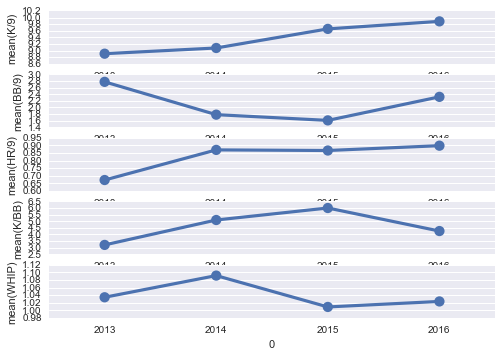

In [11]:
# 年度ごとのグラフにしてみる
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(5);
sns.pointplot(x=0, y="K/9", data=pitchs, ax=ax[0])
sns.pointplot(x=0, y="BB/9", data=pitchs, ax=ax[1])
sns.pointplot(x=0, y="HR/9", data=pitchs, ax=ax[2])
sns.pointplot(x=0, y="K/BB", data=pitchs, ax=ax[3])
sns.pointplot(x=0, y="WHIP", data=pitchs, ax=ax[4])